<a href="https://colab.research.google.com/github/pranealmerchant/pmerchant/blob/main/Final_Project_Code_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from google.colab import drive
import io

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('breast cancer.csv')
print(df)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# for analysis purposes, will look to determine the count of the number of 'empty'(for example NA, NaN) values in this data set

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#drop the empty columns with missing values from the dataset. Will look to drop the column with all missing values 

df=df.dropna(axis=1)
df




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#checking on the new number of rows and columns after any empty values/columns have been dropped from the dataset.

df.shape

(569, 32)

In [ ]:
#after the data has been cleaned, the next step is to determine what is the number of 'Benign' and 'Malignant' cases in the dataset.

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


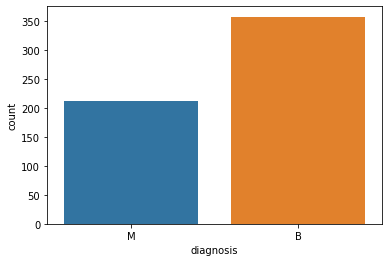

In [ ]:
#after determing the number values of the Benign and Malignant cases in the dataset, the next step will be to visualize these statistics to further understand difference in the dataset between number of patients with a Malignant and Benign diagnosis.

sns.countplot(df['diagnosis'], label='Number of cases')

In [ ]:
#another useful step will be to view the data type of each category and decide if there needs to be any transformation or any of the categories to make it easier for further data analysis 

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#to make it easier for data analysis purposes, the diagnosis category will be converted to numerical values as well. 

df['diagnosis']= df['diagnosis'].map({'M':1, 'B':0})

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#after cleaning up the data, the next step is not to determine the level of correlation between the different categories. 

df.corr()

#based on the correlation values, it appears that categories such as radius mean, perimeter mean and are means are correlated with diagnosis.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


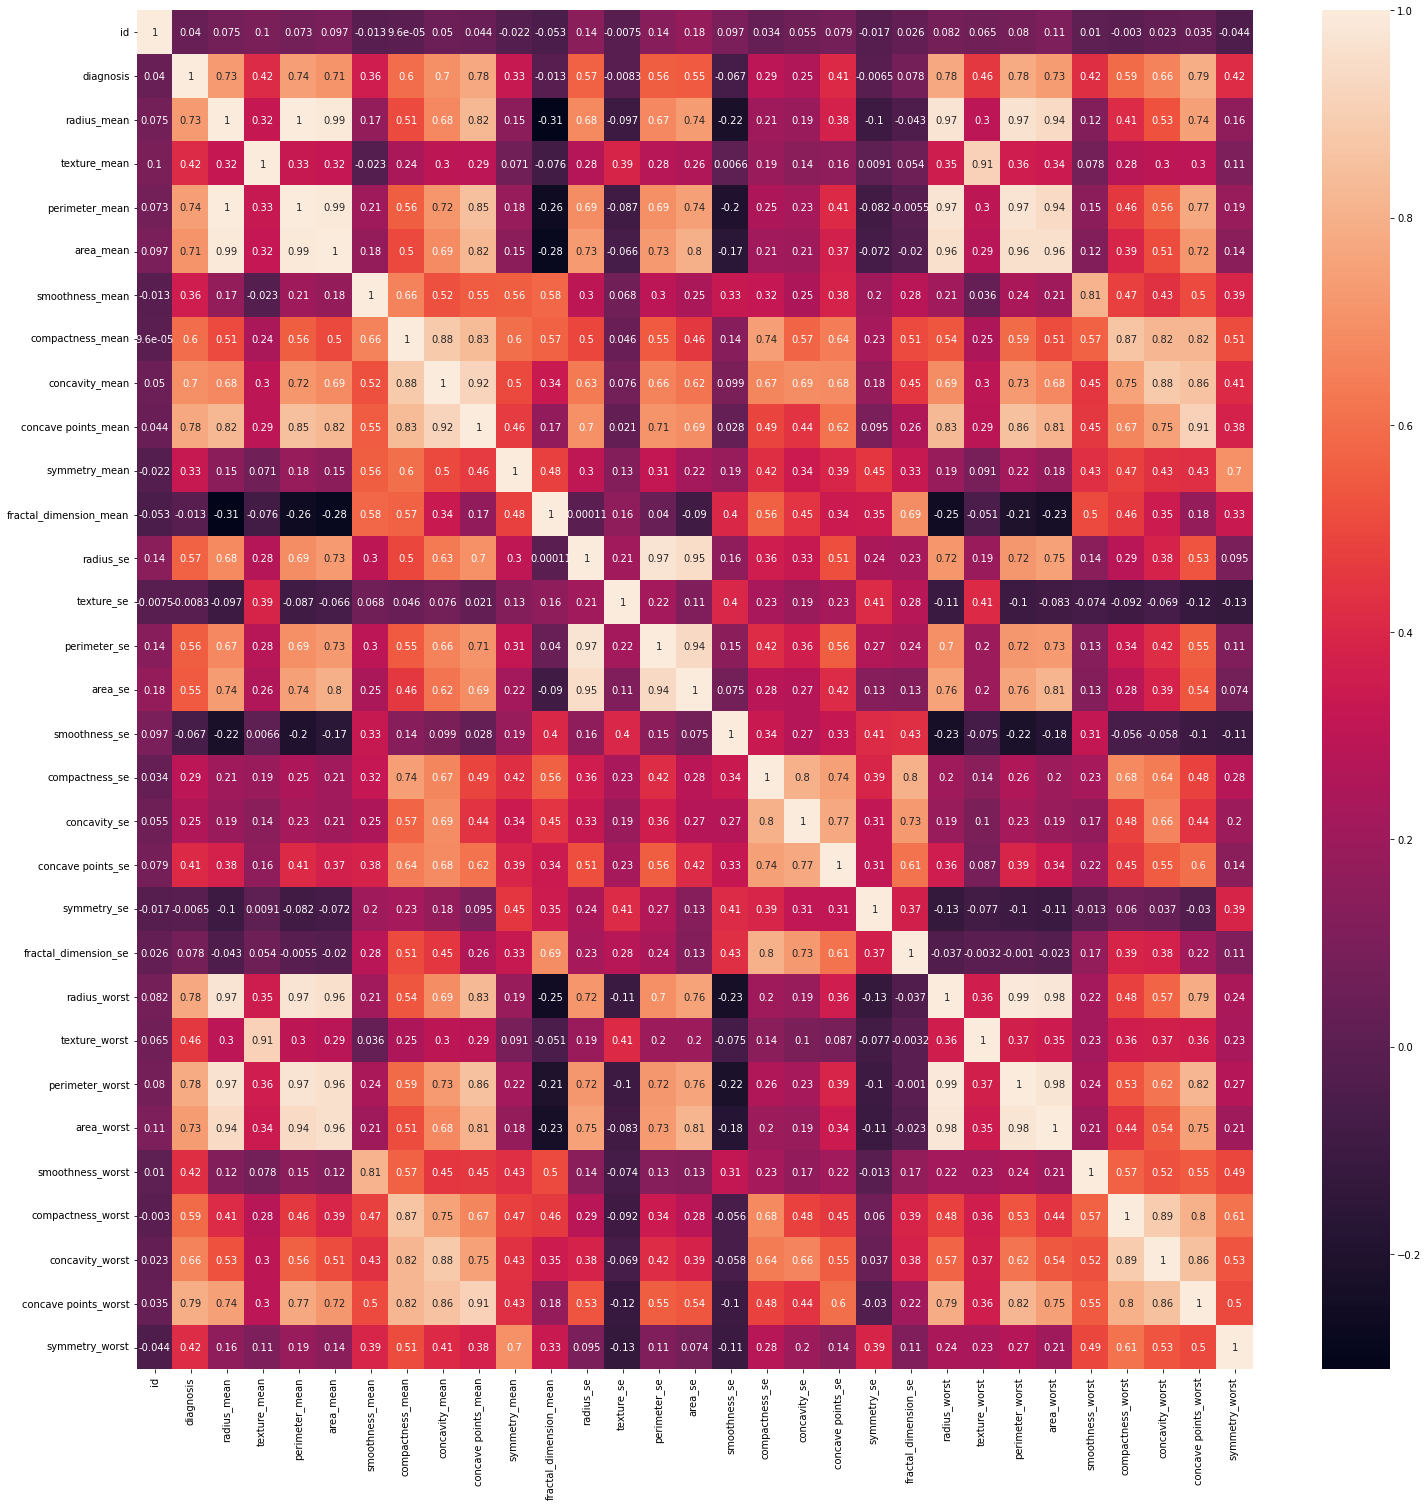

In [ ]:
#to further understand the levels of correlation of individual characteritics, it may be helpful to visualize the correlations as well.  
plt.figure(figsize=(25,25))
sns.heatmap(df.iloc[:,0:31].corr(), annot=True)

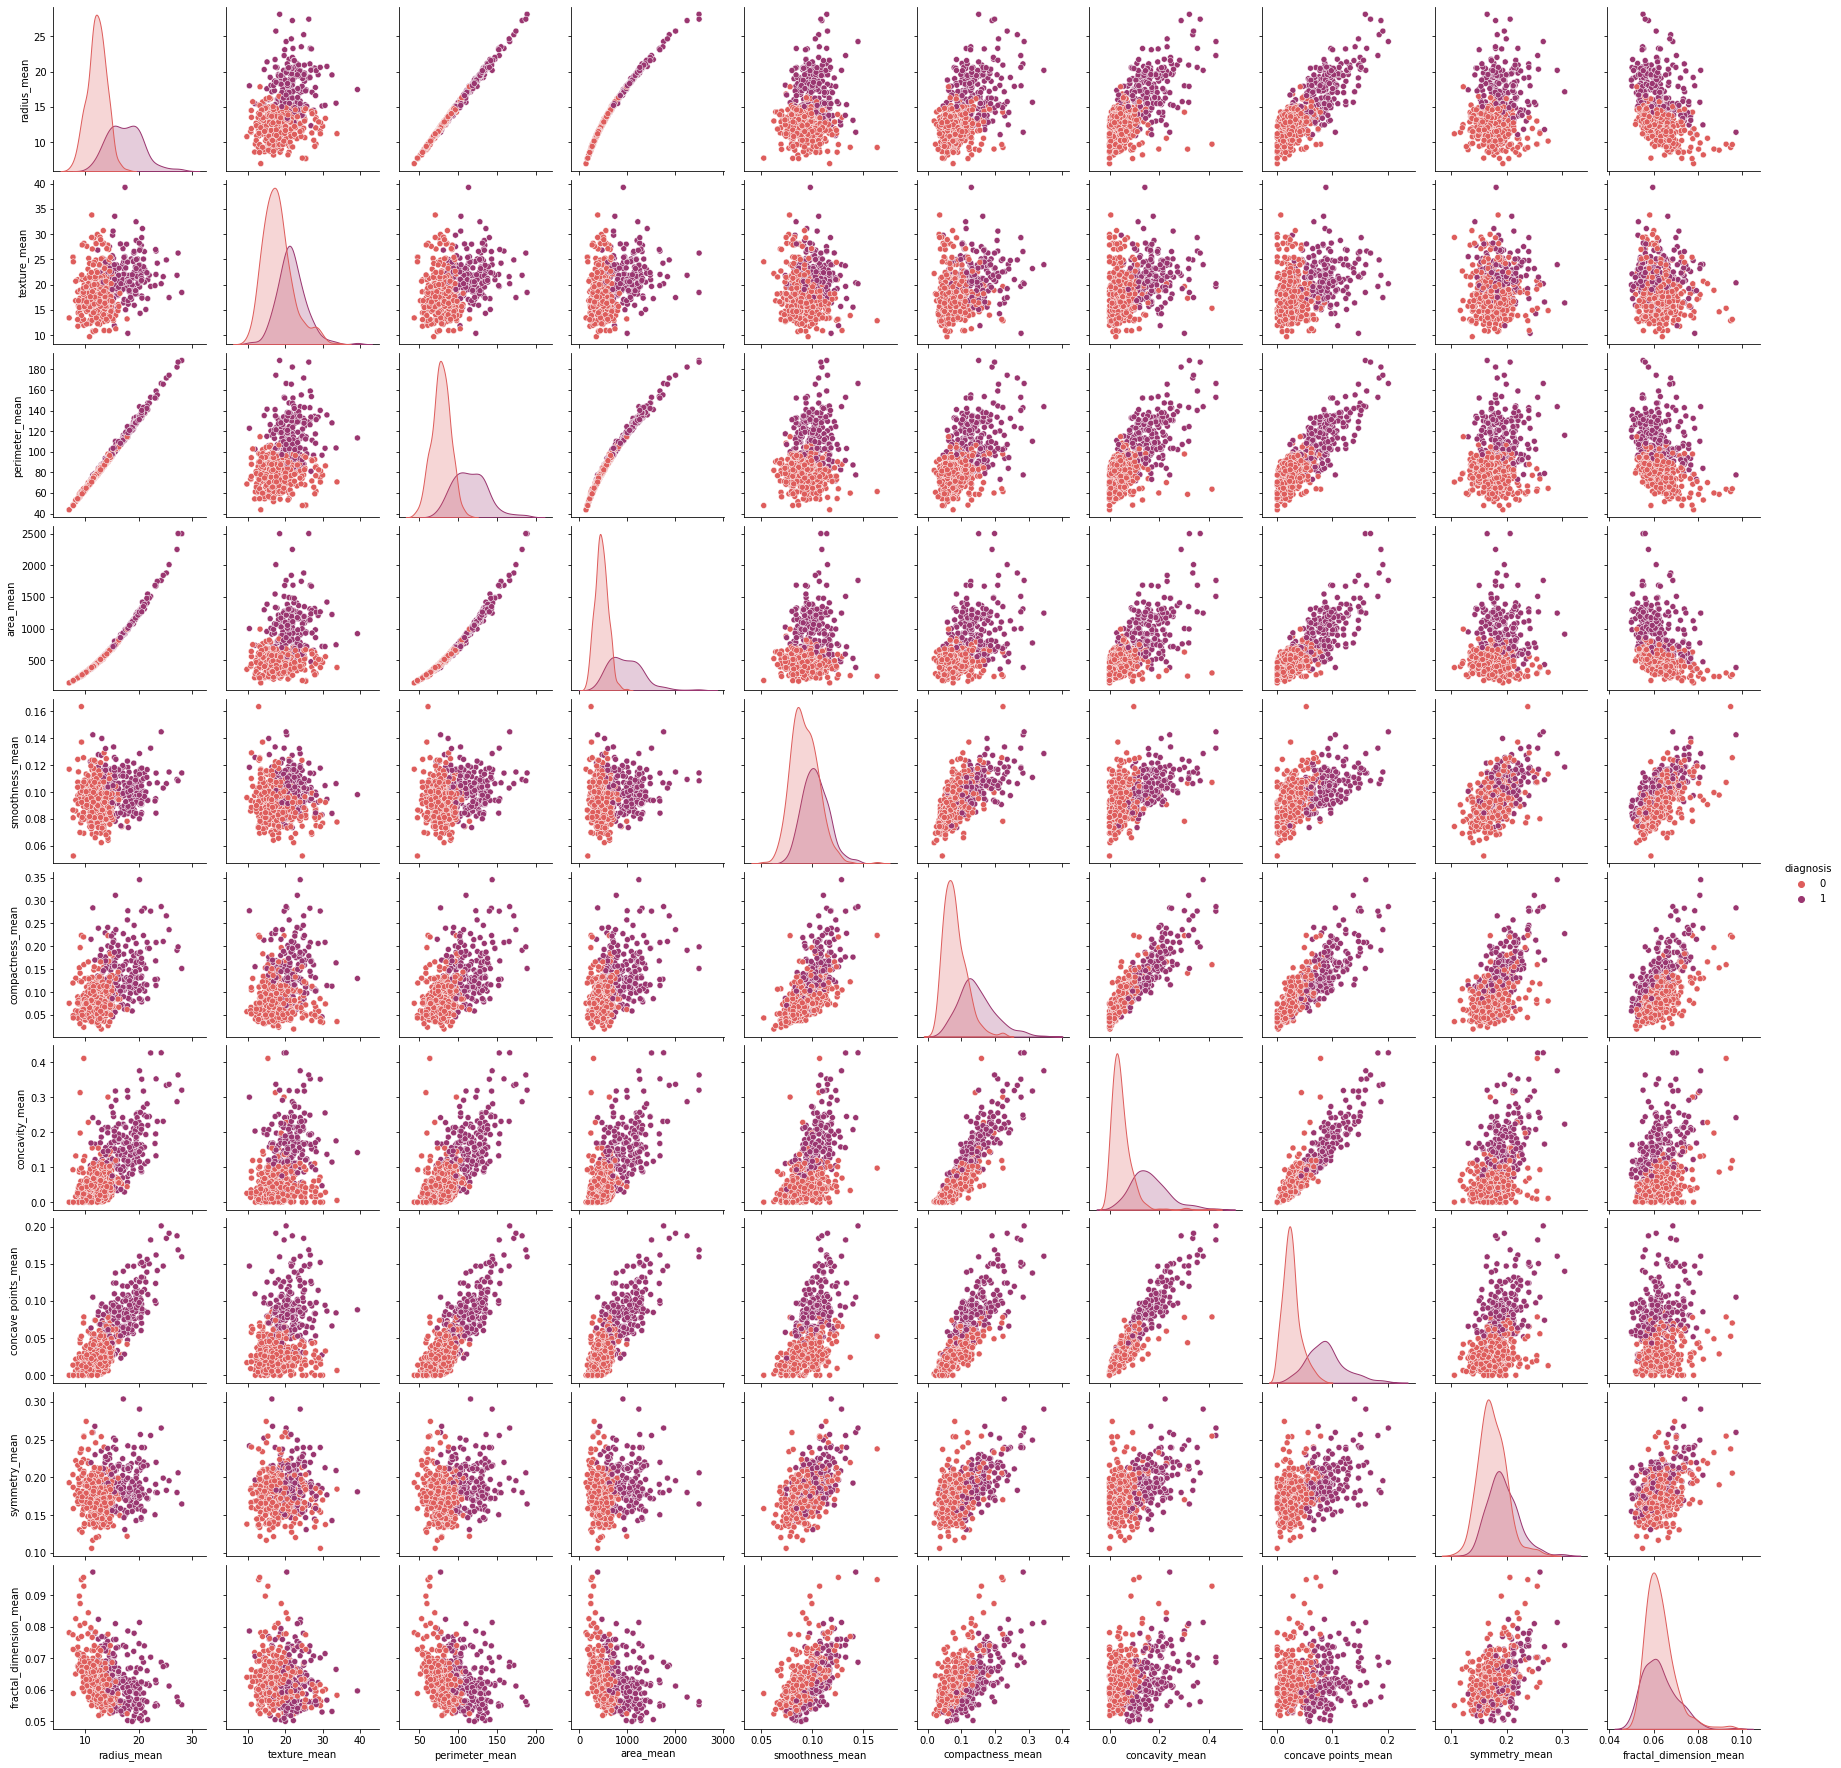

In [ ]:
#after seeing the correlation values displayed on a correlation plot, it is useful to plot the coreelations graphically to further understand the strength of correlation of different characteristics with diagnosis. Plotting just the 'mean' characteristics displayed the following:

cols= ['diagnosis',
       'radius_mean',
       'texture_mean',
       'perimeter_mean',
       'area_mean',
       'smoothness_mean',
       'compactness_mean',
       'concavity_mean',
       'concave points_mean',
       'symmetry_mean',
       'fractal_dimension_mean']
  
  #based on the scatterplots displayed, it can be said that radius mean, perimeter mean and area mean have a highly linear correlation with the diagnosis of breast cancer.

sns.pairplot(data=df[cols], hue='diagnosis', palette='flare')

In [ ]:
#the next step as a part of the data analysis will be to split the data set into 70% training and 30% testing. 

X=df.drop(['diagnosis'],axis=1) #X will be independent variables from the data set, which is everything except the 'diagnosis' category
Y= df['diagnosis'] #Y will be the dependent variable ('diagnosis')
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.30, random_state=0)

In [ ]:
#After establishibg the train and testing sets, the next step will be to scale the data. Scaling is done to bring all the values to a consistent standard which makes further data analysis easier. 

ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

X_train

array([[-0.232028  , -0.74998027, -1.09978744, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-0.23217735, -1.02821446, -0.1392617 , ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.17081111, -0.53852228, -0.29934933, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [ 6.83303935, -1.3214733 , -0.20855336, ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-0.23231516, -1.24245479, -0.23244704, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.2319212 , -0.74441558,  1.13188181, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [ ]:
#Logistic Regression

LR= LogisticRegression()
model1=LR.fit(X_train,Y_train)
prediction1=model1.predict(X_test)

model1
prediction1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
CM=confusion_matrix(Y_test,prediction1)
CM #confusion matrix determines that this model is currently predicting 104 cases correctly (True Positive), 4 cases incorrectly identified (False Positive), 2 cases that are False Negative, and 61 cases which are True Negative.

array([[103,   5],
       [  2,  61]])

In [ ]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP)) 

cm = {'Predicted (Positive)': [TP, FP],
        'Predicted (Negative)': [FN, TN],}

df = pd.DataFrame(cm, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
index=['Actual (Positive)', 'Actual (Negative)'])
    

df

Testing accuracy: 0.9590643274853801


,Predicted (Positive),Predicted (Negative)
Actual (Positive),103,2
Actual (Negative),5,61


In [ ]:
#create a classification report to display the metrics for the model for the basis of comparison
#the classification report will provide precision and recall for both benign (0) and malignant(1) cases in the dataset.
#The precision value represents all positive cases, which includes false positives. 
#The recall value represents all of the correct positive predictions that have been made out of all the positive predictions. 

from sklearn.metrics import classification_report 
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
from sklearn.model_selection import cross_val_score
model1=LR.fit(X_train,Y_train)
scores = cross_val_score(model1, X_train, Y_train, scoring='r2', cv=10)
scores
print("Average Cross Validation scores :{}".format(scores.mean()))

Average Cross Validation scores :0.9248571428571427


In [ ]:
#Decision Tree Classification

dtc=DecisionTreeClassifier()
model2= dtc.fit(X_train,Y_train)
prediction2=model2.predict(X_test)
cm2=confusion_matrix(Y_test,prediction2)
cm2

array([[100,   8],
       [  5,  58]])

In [ ]:
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP)) 

cm = {'Predicted (Positive)': [TP, FP],
        'Predicted (Negative)': [FN, TN],}

df = pd.DataFrame(cm, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
index=['Actual (Positive)', 'Actual (Negative)'])
    

df

Testing accuracy: 0.9239766081871345


,Predicted (Positive),Predicted (Negative)
Actual (Positive),100,5
Actual (Negative),8,58


In [ ]:
#create a classification report to display the metrics for the model for the basis of comparison

from sklearn.metrics import classification_report 
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X_train, Y_train, scoring='r2', cv=10)
scores
print("Average Cross Validation scores :{}".format(scores.mean()))

Average Cross Validation scores :0.6559285714285714


In [ ]:
#Random Forest Classification

rfc=RandomForestClassifier()
model3=rfc.fit(X_train,Y_train)
prediction3=model3.predict(X_test)
cm3=confusion_matrix(Y_test,prediction3)
cm3

array([[104,   4],
       [  1,  62]])

In [ ]:
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP))

cm3 = {'Predicted (Positive)': [TP, FP],
        'Predicted (Negative)': [FN, TN],}

df = pd.DataFrame(cm3, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
index=['Actual (Positive)', 'Actual (Negative)'])
    

df

Testing accuracy: 0.9707602339181286


,Predicted (Positive),Predicted (Negative)
Actual (Positive),104,1
Actual (Negative),4,62


In [ ]:
#create a classification report to display the metrics for the model for the basis of comparison

from sklearn.metrics import classification_report 
print(classification_report(Y_test,prediction3))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model3, X_train, Y_train, scoring='r2', cv=10)
scores
print("Average Cross Validation scores :{}".format(scores.mean()))

Average Cross Validation scores :0.7966904761904762


In [ ]:
#KNN Neighbors Classification

knn=KNeighborsClassifier()
model4=knn.fit(X_train,Y_train)
prediction4=model4.predict(X_test)
cm4=confusion_matrix(Y_test,prediction4)
cm4

array([[105,   3],
       [  5,  58]])

In [ ]:
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP))

cm4 = {'Predicted (Positive)': [TP, FP],
        'Predicted (Negative)': [FN, TN],}

df = pd.DataFrame(cm4, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
index=['Actual (Positive)', 'Actual (Negative)'])
    

df

Testing accuracy: 0.9532163742690059


,Predicted (Positive),Predicted (Negative)
Actual (Positive),105,5
Actual (Negative),3,58


In [ ]:
#create a classification report to display the metrics for the model for the basis of comparison

from sklearn.metrics import classification_report 
print(classification_report(Y_test,prediction4))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model4, X_train, Y_train, scoring='r2', cv=10)
scores
print("Average Cross Validation scores :{}".format(scores.mean()))

Average Cross Validation scores :0.8283571428571429


In [ ]:
#Support Vector Machines

svm=SVC()
model5=svm.fit(X_train,Y_train)
prediction5=model5.predict(X_test)
cm5=confusion_matrix(Y_test,prediction5)
cm5

array([[106,   2],
       [  3,  60]])

In [ ]:
TP=cm5[0][0]
TN=cm5[1][1]
FN=cm5[1][0]
FP=cm5[0][1]
print('Testing accuracy:',(TP+TN)/(TP+TN+FN+FP))

cm5 = {'Predicted (Positive)': [TP, FP],
        'Predicted (Negative)': [FN, TN],}

df = pd.DataFrame(cm5, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
index=['Actual (Positive)', 'Actual (Negative)'])
    

df

Testing accuracy: 0.9707602339181286


,Predicted (Positive),Predicted (Negative)
Actual (Positive),106,3
Actual (Negative),2,60


In [ ]:
#create a classification report to display the metrics for the model for the basis of comparison


from sklearn.metrics import classification_report 
print(classification_report(Y_test,prediction5))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model5, X_train, Y_train, scoring='r2', cv=10)
scores
print("Average Cross Validation scores :{}".format(scores.mean()))

Average Cross Validation scores :0.9146666666666666
